In [2]:
# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Show all columns
pd.set_option('display.max_columns', None)

# Load data
df = pd.read_csv('/content/synthetic_ai_professional_data.csv')
df.head()


,employee_index,user_id,user_role,department,experience_level,task_type,AI_tool_used,hours_worked_per_week,time_saved_per_week,satisfaction_score,performance_improvement_pct,usage_frequency,country,remote_status
0,1,U0001,Marketing Specialist,Marketing,Junior,Email Drafting,Copilot,42.9,6.7,3,15.4,Daily,USA,Remote
1,2,U0002,Developer,Tech,Mid,Code Review,Copilot,39.7,11.0,5,24.4,Daily,USA,Hybrid
2,3,U0003,Financial Analyst,Finance,Senior,Email Drafting,Copilot,41.0,13.2,7,28.7,Daily,Japan,Office
3,4,U0004,Developer,Tech,Junior,Coding Help,Notion AI,39.3,9.1,4,18.0,Weekly,USA,Remote
4,5,U0005,Financial Analyst,Finance,Mid,Forecasting,Gemini,40.5,8.6,6,18.8,Weekly,Japan,Office


In [3]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/11nyl7KrFRMVtEJdyucGkJD6A9r_sDOL6zwexs8wn210/edit#gid=0


In [6]:
import pandas as pd
df = pd.read_csv('/content/synthetic_ai_professional_data.csv')
# Check missing values
print(df.isnull().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Quick describe
print(df.describe(include='all'))


employee_index                 0
user_id                        0
user_role                      0
department                     0
experience_level               0
task_type                      0
AI_tool_used                   0
hours_worked_per_week          0
time_saved_per_week            0
satisfaction_score             0
performance_improvement_pct    0
usage_frequency                0
country                        0
remote_status                  0
dtype: int64
        employee_index user_id  user_role department experience_level  \
count      1000.000000    1000       1000       1000             1000   
unique             NaN    1000          7          5                3   
top                NaN   U1000  Developer       Tech              Mid   
freq               NaN       1        260        386              510   
mean        500.500000     NaN        NaN        NaN              NaN   
std         288.819436     NaN        NaN        NaN              NaN   
min           

/tmp/ipython-input-970204142.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='user_role', y='time_saved_per_week', ci=None)


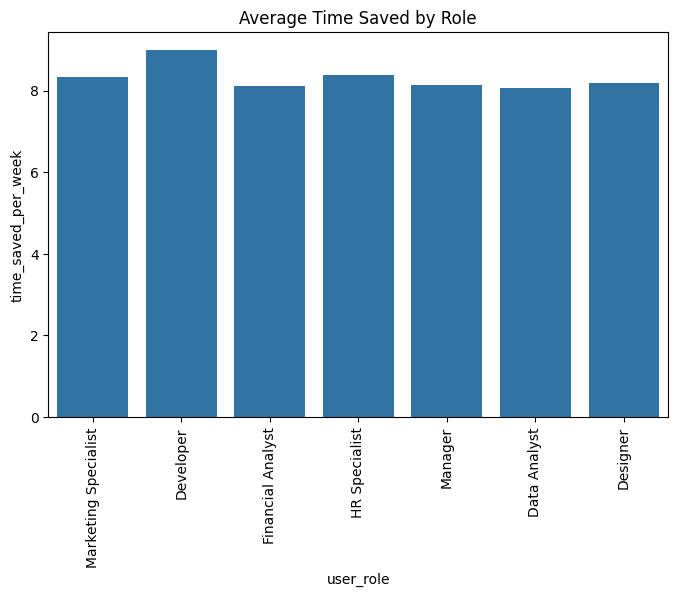

In [11]:
#Avg time saved by role
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='user_role', y='time_saved_per_week', ci=None)
plt.xticks(rotation=90)
plt.title('Average Time Saved by Role')
plt.show()


/tmp/ipython-input-976560802.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='AI_tool_used', y='time_saved_per_week', ci=None)


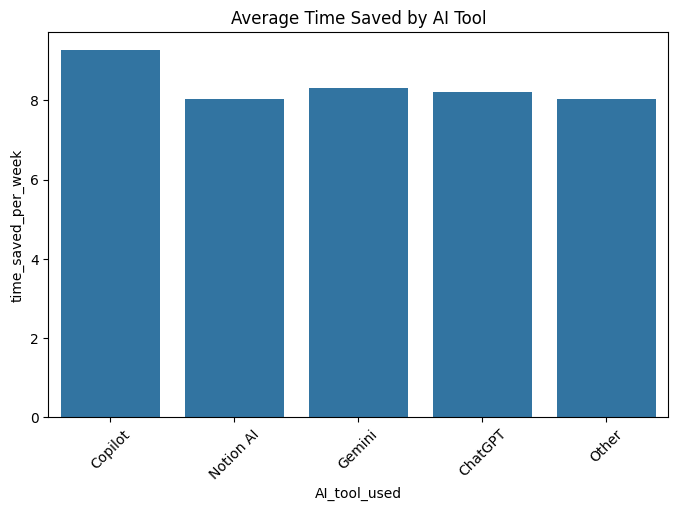

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='AI_tool_used', y='time_saved_per_week', ci=None)
plt.xticks(rotation=45)
plt.title('Average Time Saved by AI Tool')
plt.show()


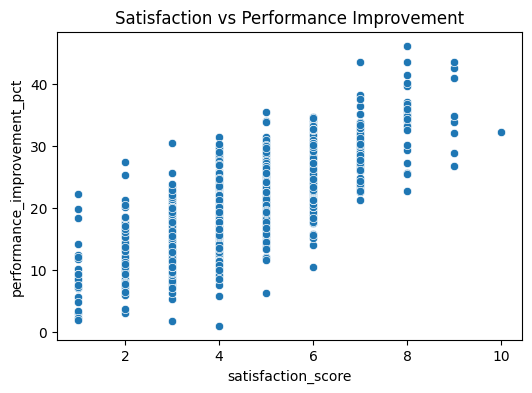

Correlation: 0.76


In [14]:
#Correlation between satisfaction & performance
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='satisfaction_score', y='performance_improvement_pct')
plt.title('Satisfaction vs Performance Improvement')
plt.show()

corr = df['satisfaction_score'].corr(df['performance_improvement_pct'])
print(f"Correlation: {corr:.2f}")


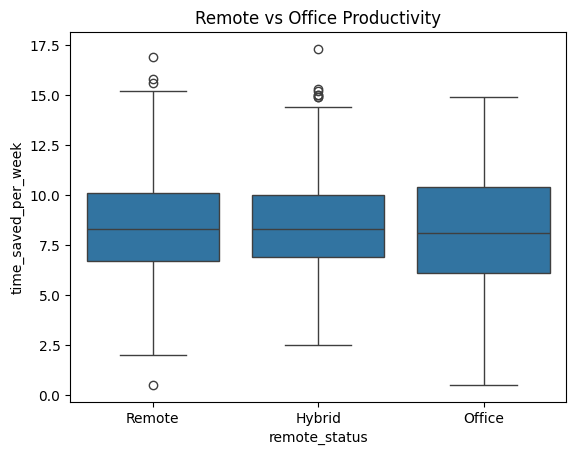

In [16]:
#Remote vs Office Productivity
sns.boxplot(data=df, x='remote_status', y='time_saved_per_week')
plt.title('Remote vs Office Productivity')
plt.show()


In [20]:
# --- Fixed ML Block ---

# Imports (run again just in case)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Select useful features
features = ['experience_level', 'satisfaction_score', 'performance_improvement_%']
target = 'time_saved_per_week'

# Encode categorical variable (experience_level)
df_encoded = pd.get_dummies(df[['experience_level']], drop_first=True)

# Combine encoded + numeric columns
df_model = pd.concat([df_encoded, df[['satisfaction_score', 'performance_improvement_pct']]], axis=1)

X = df_model
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("R2 Score:", round(r2_score(y_test, y_pred), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 3))



R2 Score: 0.875
MAE: 0.739


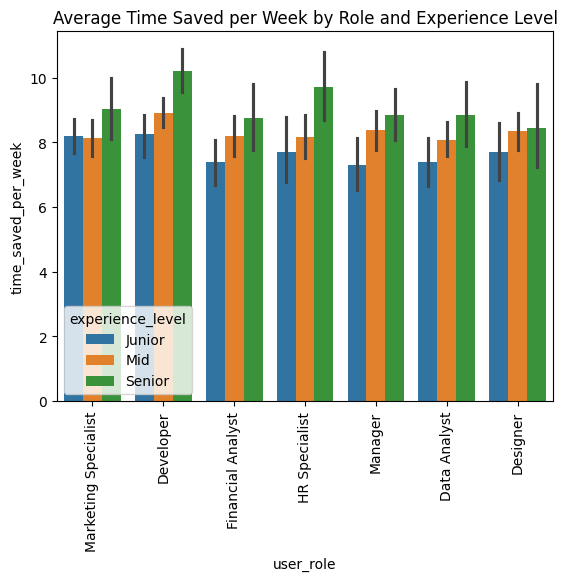

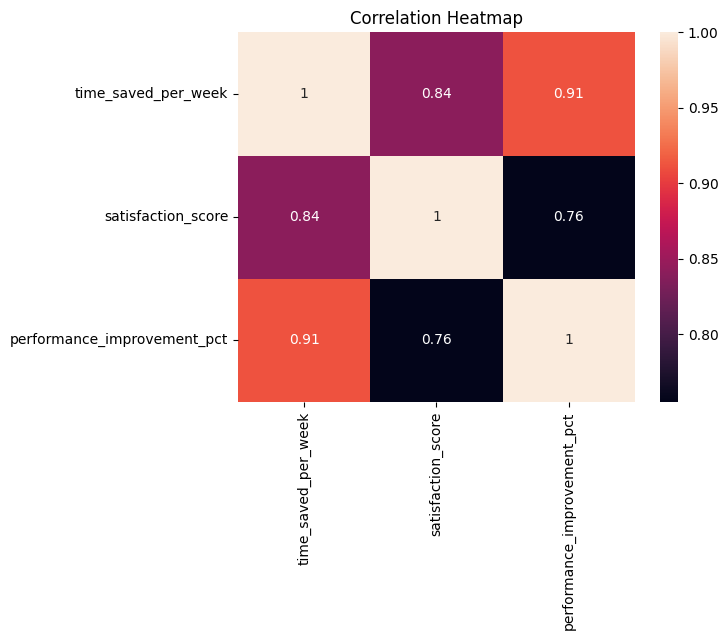

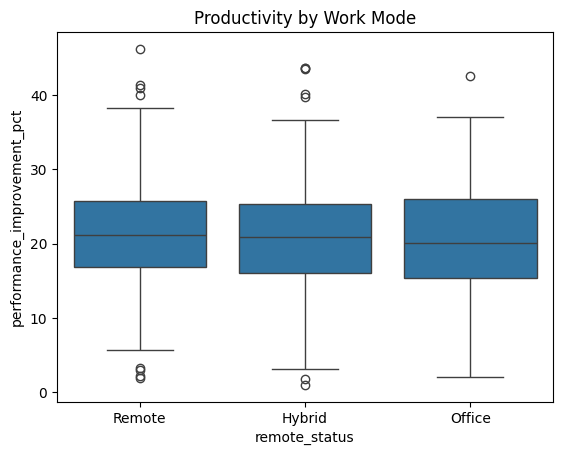

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Avg time saved by role
sns.barplot(data=df, x='user_role', y='time_saved_per_week', hue='experience_level')
plt.xticks(rotation=90)
plt.title("Average Time Saved per Week by Role and Experience Level")
plt.show()

# Correlation heatmap
sns.heatmap(df[['time_saved_per_week', 'satisfaction_score', 'performance_improvement_pct']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Remote vs Office productivity
sns.boxplot(data=df, x='remote_status', y='performance_improvement_pct')
plt.title("Productivity by Work Mode")
plt.show()


In [27]:
df['predicted_time_saved'] = model.predict(scaler.transform(X))
df.to_csv("ai_productivity_cleaned.csv", index=False)


In [28]:
# --- Convert hours to readable time format (e.g., "5h 30m") ---

def to_hours_minutes(x):
    hours = int(x)
    minutes = int(round((x - hours) * 60))
    return f"{hours}h {minutes}m"

df['time_saved_readable'] = df['time_saved_per_week'].apply(to_hours_minutes)
df['predicted_time_saved_readable'] = df['predicted_time_saved'].apply(to_hours_minutes)

# --- Save final cleaned file ---
df.to_csv("ai_productivity_cleaned.csv", index=False)
print("✅ Saved with readable time columns!")

✅ Saved with readable time columns!
